### First, we try using standard values as mean and a random covariance matrix of 5 parameters. We set prior distribution of all parameters to be gaussian with some standard deviation mentioned below. 

In [2]:
## Just modified from the quickstart example from cobaya

info = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [0.02242, 0.2437, 2.7255, 0.11933, 2.99],
            "covs": [[1.0, 0.8, 0.7, 0.6, 0.5],
                     [0.8, 1.0, 0.8, 0.7, 0.6],
                     [0.7, 0.8, 1.0, 0.8, 0.7]
                    ,[0.6, 0.7, 0.8, 1.0, 0.8],
                     [0.5, 0.6, 0.7, 0.8, 1.0]],
            "derived": True}},
    "params": dict([
        ("omega_b", {
            "prior": {"dist": "norm", "loc": 0.02242, "scale": 0.005},
            }),
        ("Yp", {
            "prior": {"dist": "norm", "loc": 0.2437, "scale": 0.01},
            }),
        ("T0", {
            "prior": {"dist": "norm", "loc": 2.7255, "scale": 0.001},
            }),
        ("omega_cdm", {
            "prior": {"dist": "norm", "loc": 0.11933, "scale": 0.001},
            }),
        ("N_eff", {
            "prior": {"dist": "norm", "loc": 2.99, "scale": 0.005},
            }),
        ("derived_omega_b", {
            "latex": r"\alpha^\prime"}),
        ("derived_Yp", {
            "latex": r"\beta^\prime"}),
        ("derived_T0", {
            "latex": r"γ^\prime"}),
        ("derived_omega_cdm", {
            "latex": r"\delta^\prime"}),
        ("derived_N_eff", {
            "latex": r"\theta^\prime"}),
        ]),
    "sampler": {
        "mcmc": None}}


import sys
for k, v in {"-f": "force", "-r": "resume", "-d": "debug"}.items():
    if k in sys.argv:
        info[v] = True

In [3]:
from cobaya.run import run

updated_info, sampler = run(info)

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 4740.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: omega_b:0.02844292, Yp:0.2339155, T0:2.724584, omega_cdm:0.1177616, N_eff:2.985496
[mcmc] Sampling!
[mcmc] Progress @ 2023-04-04 17:19:30 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 200 samples accepted.
[mcmc]  - Acceptance rate: 0.525
[mcmc]  - Convergence of means: R-1 = 1.545093 after 160 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + co

[mcmc]  - Convergence of means: R-1 = 0.013532 after 5600 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 7200 samples accepted.
[mcmc]  - Acceptance rate: 0.302
[mcmc]  - Convergence of means: R-1 = 0.013894 after 5760 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 7400 samples accepted.
[mcmc]  - Acceptance rate: 0.302
[mcmc]  - Convergence of means: R-1 = 0.016573 after 5920 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 7600 samples accepted.
[mcmc]  - Acceptance rate: 0.302
[mcmc]  - Convergence of means: R-1 = 0.012870 after 6080 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 7800 samples accepted.
[mcmc]  - Acceptance rate: 0.301
[mcmc]  - Convergence of means: R-1 = 0.009088 after 6240 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

Mean:
[0.02222228 0.24353569 2.72547306 0.11931621 2.9899034 ]
Covariance matrix:
[[ 2.57673094e-05  1.05799517e-06 -2.25137293e-07  2.28753859e-08
  -1.53566458e-07]
 [ 1.05799517e-06  9.46000963e-05 -5.27532027e-08  3.97968635e-07
   1.95119013e-06]
 [-2.25137293e-07 -5.27532027e-08  9.84203254e-07  5.37272240e-09
  -1.74378717e-07]
 [ 2.28753859e-08  3.97968635e-07  5.37272240e-09  9.57715543e-07
   2.96129642e-07]
 [-1.53566458e-07  1.95119013e-06 -1.74378717e-07  2.96129642e-07
   2.40946639e-05]]


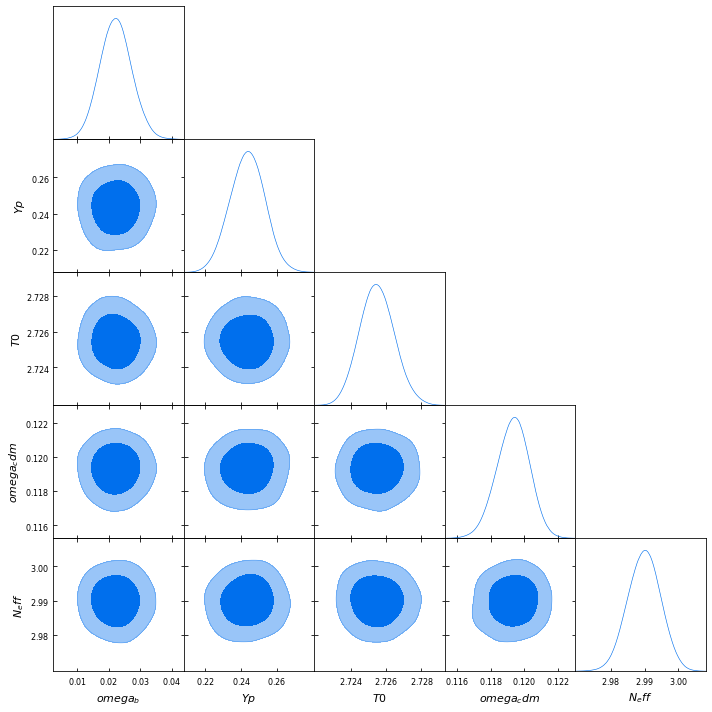

In [4]:
# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:5]
covmat = gd_sample.getCovMat().matrix[:5, :5]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
%matplotlib inline  
# uncomment if running from the Jupyter notebook
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["omega_b", "Yp", "T0", "omega_cdm", "N_eff"], filled=True)

### I tried getting a covariance matrix of the parameters using the normalized sensitivity. I am not sure about this. Each normailzed sensitivity file has 201 values (channels) for each parameter. The Covariance matrix is printed below.

In [7]:
import numpy as np

omega_b_sensi = np.loadtxt("Omega_b Normalized Sensitivity")
Yp_sensi = np.loadtxt("Yp Normalized Sensitivity")
T0_sensi = np.loadtxt("T0 Normalized Sensitivity")
omega_cdm_sensi = np.loadtxt("Omega_cdm Normalized Sensitivity")
N_eff_sensi = np.loadtxt("N_eff Normalized Sensitivity")

data = np.array([omega_b_sensi, Yp_sensi, T0_sensi, omega_cdm_sensi, N_eff_sensi])

covMatrix = np.cov(data, bias=False) #, bias=False
print( covMatrix)


[[ 1.84765552e-50 -1.40209811e-54 -4.92956322e-54  1.09944602e-53
   8.28285848e-56]
 [-1.40209811e-54  7.12078612e-56 -2.24516534e-57  5.15797933e-56
   2.17301216e-58]
 [-4.92956322e-54 -2.24516534e-57  6.16914393e-57 -1.14591934e-56
  -7.36565253e-59]
 [ 1.09944602e-53  5.15797933e-56 -1.14591934e-56  6.85101418e-56
   3.87111790e-58]
 [ 8.28285848e-56  2.17301216e-58 -7.36565253e-59  3.87111790e-58
   2.42501937e-60]]


### Now, we set the likelihood with this covariance matrix (in line 5 of the below code) and run.

In [11]:
info = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [0.02242, 0.2437, 2.7255, 0.11933, 2.99],
            "covs":covMatrix + 1e-57 * np.identity(5), 
            "derived": True}},
    "params": dict([
        ("omega_b", {
            "prior": {"dist": "norm", "loc": 0.02242, "scale": 0.1}
            }),
        ("Yp", {
            "prior": {"dist": "norm", "loc": 0.2437, "scale": 0.1}
            }),
        ("T0", {
            "prior": {"dist": "norm", "loc": 2.7255, "scale": 0.1}
            }),
        ("omega_cdm", {
            "prior": {"dist": "norm", "loc": 0.11933, "scale": 0.1}
            }),
        ("N_eff", {
            "prior": {"dist": "norm", "loc": 2.99, "scale": 0.1}
            }),
        ("derived_omega_b", {
            "latex": r"\alpha^\prime"}),
        ("derived_Yp", {
            "latex": r"\beta^\prime"}),
        ("derived_T0", {
            "latex": r"γ^\prime"}),
        ("derived_omega_cdm", {
            "latex": r"\delta^\prime"}),
        ("derived_N_eff", {
            "latex": r"\theta^\prime"}),
        ]),
    "sampler": {
        "mcmc": None}, 
    "max_tries": np.inf}


import sys
for k, v in {"-f": "force", "-r": "resume", "-d": "debug"}.items():
    if k in sys.argv:
        info[v] = True

In [12]:
from cobaya.run import run

updated_info, sampler = run(info)

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 12100.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: omega_b:0.102809, Yp:0.2429396, T0:2.809465, omega_cdm:0.206019, N_eff:2.879695
[mcmc] Sampling!
[mcmc] Progress @ 2023-04-04 17:29:18 : 1 steps taken, and 0 accepted.
[mcmc] *ERROR* The chain has been stuck for 200 attempts, stopping sampling. Make sure the reference point is sensible and initial covmat. For parameters not included in an initial covmat, the 'proposal' width set for each parameter 

LoggedError: The chain has been stuck for 200 attempts, stopping sampling. Make sure the reference point is sensible and initial covmat. For parameters not included in an initial covmat, the 'proposal' width set for each parameter should be of order of the expected conditional posterior width, which may be much smaller than the marginalized posterior width - choose a smaller rather than larger value if in doubt. You can also decrease the 'proposal_scale' option for mcmc, though small values will sample less efficiently once things converge. Or make your starting 'ref'tighter around an expected best-fit value
Alternatively (though not advisable) make 'max_tries: np.inf' (or 'max_tries: .inf' in yaml).
Current point: omega_b:-0.09298832, Yp:0.2907322, T0:2.724029, omega_cdm:0.1592505, N_eff:2.989978
Current result: LogPosterior(logpost=-1.6418287945018425e+52, logpriors=[6.0618869575571965], loglikes=array([-1.64182879e+52]), derived=[-8.490369454269755e+23, 1.7512260086276806e+26, 2.720814906140193e+24, 4.600849510102755e+25, -6.614018305613256e+24], finite=False)
Last proposal: [-0.03870957  0.33777317  2.72424324  0.11907418  2.9714906 ]
With rejected result: LogPosterior(logpost=-3.5603920376955926e+53, logpriors=[6.271691378394282], loglikes=array([-3.56039204e+53]), derived=[-4.4971856455766274e+23, 3.503259674189623e+26, 2.825499557755662e+25, -5.0353891497270354e+26, -5.7879196450652634e+26], finite=False)

### I think I am calculating the covariance matrix the wrong way. Even if we add some scaled identity matrix, this error doesn't show up, but sampling stops at some point in the run.  

In [ ]:
# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:5]
covmat = gd_sample.getCovMat().matrix[:5, :5]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
%matplotlib inline  
# uncomment if running from the Jupyter notebook
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["omega_b", "Yp", "T0", "omega_cdm", "N_eff"], filled=True)